<a href="https://colab.research.google.com/github/lynnfdsouza/Aarya/blob/main/Russia_Ukraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

excel_file = pd.ExcelFile('/content/SIPRI-Milex-data-2014-2024 (1) (2).xlsx')
print(excel_file.sheet_names)

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2023) US$', 'Current US$', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [47]:
import pandas as pd

# Load the 'Share of GDP' sheet from the SIPRI data, skipping initial rows
try:
    # Based on the head display, the actual header is in the row after skipping 4 rows.
    # So, we skip the first 4 rows (0-3) and let pandas use the 5th row as header (index 0 after skipping).
    df_sipri_gdp_share = pd.read_excel('/content/SIPRI-Milex-data-2014-2024 (1) (2).xlsx', sheet_name='Share of GDP', skiprows=4)

    # Display the first few rows and column names to inspect the data
    display(df_sipri_gdp_share.head())
    display(df_sipri_gdp_share.columns)

    # Filter for Russia and Ukraine
    countries_filter = ['Russia', 'Ukraine']
    # Use the correct column name for countries which is 'Unnamed: 0' based on the output
    country_column_name = 'Unnamed: 0'
    df_military_expenditure_gdp = df_sipri_gdp_share[df_sipri_gdp_share[country_column_name].isin(countries_filter)]

    # Select the relevant columns (Country and years 2014-2024)
    # The column names for the years are 'Unnamed: 2' through 'Unnamed: 12'
    years_columns_unnamed = [f'Unnamed: {i}' for i in range(2, 13)] # Unnamed: 2 to Unnamed: 12 correspond to 2014 to 2024
    columns_to_keep = [country_column_name] + years_columns_unnamed
    df_military_expenditure_gdp = df_military_expenditure_gdp[columns_to_keep]

    # Rename the year columns to the actual years for clarity
    year_column_map = {f'Unnamed: {i}': str(2012 + i) for i in range(2, 13)} # Unnamed: 2 is 2014, Unnamed: 12 is 2024
    df_military_expenditure_gdp = df_military_expenditure_gdp.rename(columns=year_column_map)


    # Display the resulting DataFrame
    display(df_military_expenditure_gdp)

except Exception as e:
    print(f"Error loading Excel file or filtering data: {e}")
    print("Please check the sheet name and column names.")

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Country,Notes,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,§4,0.049649,0.055507,0.056527,0.053071,0.049299,0.05327,0.058861,0.0489,0.040575,0.073904,0.079715


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

,Unnamed: 0,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
152,Russia,0.04113,0.048715,0.054251,0.04249,0.037198,0.038603,0.041447,0.035759,0.046073,0.054023,0.070523
153,Ukraine,0.029674,0.038478,0.036686,0.032415,0.036352,0.040679,0.044003,0.034255,0.256424,0.365282,0.344815


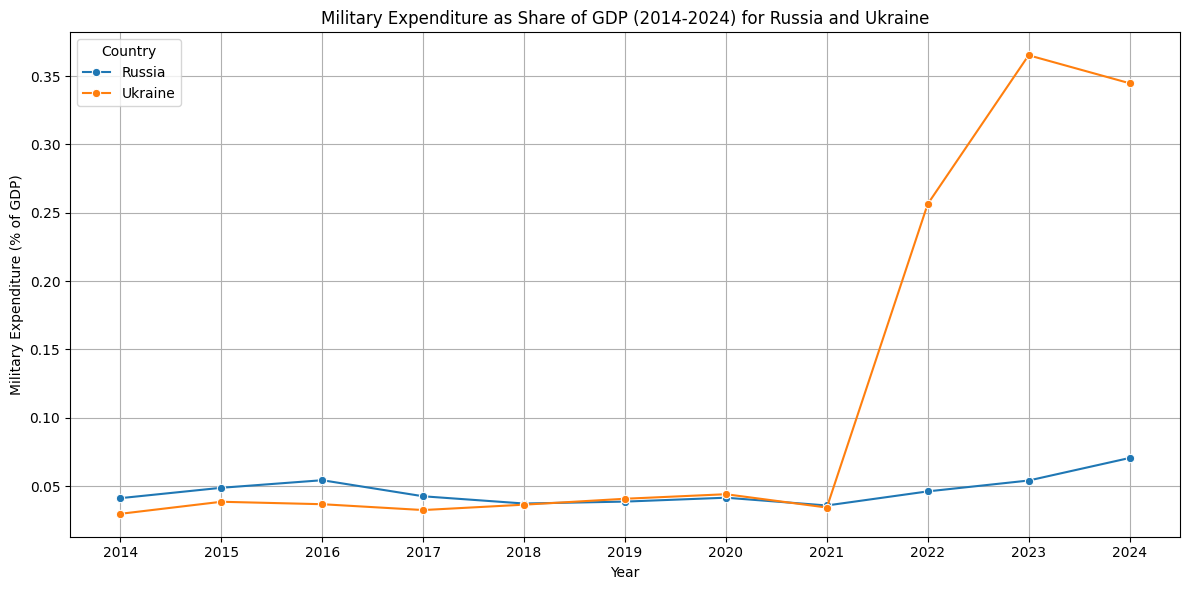

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# The DataFrame df_military_expenditure_gdp contains the data
# It has 'Unnamed: 0' for country and year columns from '2014' to '2024'

# Melt the DataFrame to a long format for plotting
df_melted = df_military_expenditure_gdp.melt(
    id_vars='Unnamed: 0',
    value_vars=[str(year) for year in range(2014, 2025)],
    var_name='Year',
    value_name='Military Expenditure (% of GDP)'
)

# Rename the country column for clarity
df_melted = df_melted.rename(columns={'Unnamed: 0': 'Country'})

# Convert 'Year' column to numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

# Convert 'Military Expenditure (% of GDP)' to numeric, coercing errors
df_melted['Military Expenditure (% of GDP)'] = pd.to_numeric(df_melted['Military Expenditure (% of GDP)'], errors='coerce')


# Drop rows with NaN values that resulted from coercion
df_melted.dropna(subset=['Military Expenditure (% of GDP)'], inplace=True)


# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Military Expenditure (% of GDP)', hue='Country', marker='o')

plt.title('Military Expenditure as Share of GDP (2014-2024) for Russia and Ukraine')
plt.xlabel('Year')
plt.ylabel('Military Expenditure (% of GDP)')
plt.grid(True)
plt.xticks(range(2014, 2025)) # Set x-axis ticks to show each year
plt.tight_layout()
plt.show()

,Country,Year,Military Expenditure (% of GDP),STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,INDICATOR,...,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,COMMENT_OBS,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,Ukraine,2018,0.036352,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,UKR,WB_SSGD_CONTROL_CORRUPTION,...,Units,NUMBER,Number (real number),602,CCYY,NaN,A,Normal value,PU,Public
1,Ukraine,2018,0.036352,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,UKR,WB_SSGD_POL_STABILITY_ESTIMATE,...,Units,NUMBER,Number (real number),602,CCYY,NaN,A,Normal value,PU,Public
2,Ukraine,2018,0.036352,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,UKR,WB_SSGD_RULE_OF_LAW,...,Units,NUMBER,Number (real number),602,CCYY,NaN,A,Normal value,PU,Public
3,Ukraine,2018,0.036352,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,UKR,WB_SSGD_VOICE_ACCOUNTABILITY_EST,...,Units,NUMBER,Number (real number),602,CCYY,NaN,A,Normal value,PU,Public
4,Ukraine,2021,0.034255,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,UKR,WB_SSGD_CONTROL_CORRUPTION,...,Units,NUMBER,Number (real number),602,CCYY,NaN,A,Normal value,PU,Public


Index(['Country', 'Year', 'Military Expenditure (% of GDP)', 'STRUCTURE',
       'STRUCTURE_ID', 'ACTION', 'FREQ', 'FREQ_LABEL', 'REF_AREA', 'INDICATOR',
       'INDICATOR_LABEL', 'SEX', 'SEX_LABEL', 'AGE', 'AGE_LABEL',
       'URBANISATION', 'URBANISATION_LABEL', 'UNIT_MEASURE',
       'UNIT_MEASURE_LABEL', 'COMP_BREAKDOWN_1', 'COMP_BREAKDOWN_1_LABEL',
       'COMP_BREAKDOWN_2', 'COMP_BREAKDOWN_2_LABEL', 'COMP_BREAKDOWN_3',
       'COMP_BREAKDOWN_3_LABEL', 'Indicator Value', 'AGG_METHOD',
       'AGG_METHOD_LABEL', 'DATABASE_ID', 'DATABASE_ID_LABEL', 'UNIT_MULT',
       'UNIT_MULT_LABEL', 'UNIT_TYPE', 'UNIT_TYPE_LABEL', 'TIME_FORMAT',
       'TIME_FORMAT_LABEL', 'COMMENT_OBS', 'OBS_STATUS', 'OBS_STATUS_LABEL',
       'OBS_CONF', 'OBS_CONF_LABEL'],
      dtype='object')

,Country,Year,Control of corruption,Political Stability and Absence of Violence/Terrorism,Rule of Law,Voice and Accountability,Military Expenditure (% of GDP)
0,Ukraine,2018,-0.901347,-1.869737,-0.743864,-0.037783,0.036352
1,Ukraine,2021,-0.766657,-1.098819,-0.659908,0.076311,0.034255


,Military Expenditure (% of GDP),Political Stability and Absence of Violence/Terrorism,Rule of Law,Control of corruption,Voice and Accountability
Military Expenditure (% of GDP),1.0,-1.0,-1.0,-1.0,-1.0
Political Stability and Absence of Violence/Terrorism,-1.0,1.0,1.0,1.0,1.0
Rule of Law,-1.0,1.0,1.0,1.0,1.0
Control of corruption,-1.0,1.0,1.0,1.0,1.0
Voice and Accountability,-1.0,1.0,1.0,1.0,1.0


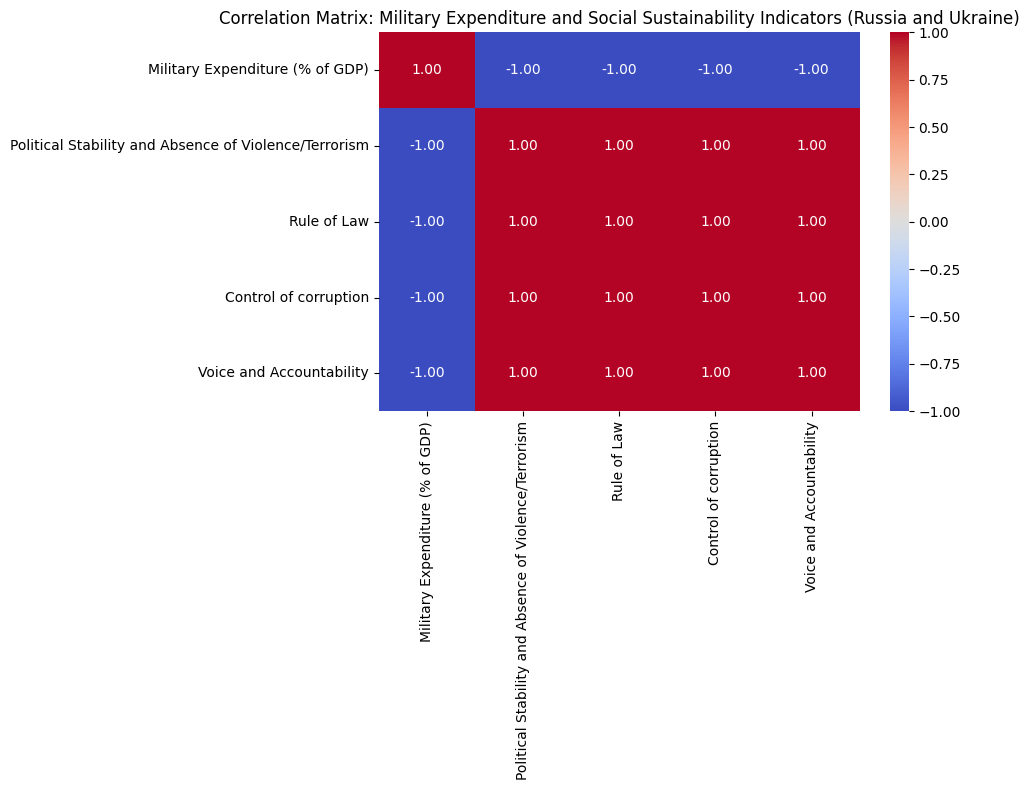

In [69]:
# The df_wb_filtered DataFrame should already have 'TIME_PERIOD' as numeric from the previous step (cell d8422fc4)
# Ensure 'Year' in df_wb_filtered is numeric
# df_wb_filtered['TIME_PERIOD'] = pd.to_numeric(df_wb_filtered['TIME_PERIOD'], errors='coerce') # This line is redundant and causing the error

# Rename columns in df_wb_filtered for merging
# Assuming 'REF_AREA_LABEL' is Country and 'TIME_PERIOD' is Year from previous steps
df_wb_filtered = df_wb_filtered.rename(columns={'REF_AREA_LABEL': 'Country', 'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Indicator Value'})

# Merge the melted military expenditure data with the filtered social sustainability data
# We will merge on 'Country' and 'Year'
df_merged = pd.merge(
    df_melted,
    df_wb_filtered,
    on=['Country', 'Year'],
    how='inner' # Use inner join to keep only rows where both datasets have data
)

# Display the merged DataFrame to see the overlapping data
display(df_merged.head())
display(df_merged.columns)

# Pivot the merged data to have indicators as columns for easier correlation calculation
df_merged_pivot = df_merged.pivot_table(
    index=['Country', 'Year'],
    columns='INDICATOR_LABEL',
    values='Indicator Value'
).reset_index()

# Merge the military expenditure back to the pivoted social sustainability data
df_correlation_data = pd.merge(
    df_merged_pivot,
    df_melted[['Country', 'Year', 'Military Expenditure (% of GDP)']],
    on=['Country', 'Year'],
    how='inner'
)

# Display the DataFrame ready for correlation
display(df_correlation_data.head())

# Select the columns for correlation analysis
# These include 'Military Expenditure (% of GDP)' and the selected social sustainability indicators
# Remove 'Government Effectiveness' as it's not in the merged data
selected_indicators_for_correlation = [
    'Political Stability and Absence of Violence/Terrorism',
    'Rule of Law',
    'Control of corruption',
    'Voice and Accountability'
]
correlation_columns = ['Military Expenditure (% of GDP)'] + selected_indicators_for_correlation

# Calculate the correlation matrix
correlation_matrix = df_correlation_data[correlation_columns].corr()

# Display the correlation matrix
display(correlation_matrix)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Military Expenditure and Social Sustainability Indicators (Russia and Ukraine)')
plt.tight_layout()
plt.show()

Analysis and summary of the correlation between military expenditure as a share of GDP and the available social sustainability indicators for Russia and Ukraine based on the results we obtained.

Based on the correlation matrix and heatmap, here is a summary of the findings:

The analysis included the following social sustainability indicators for Russia and Ukraine between 2014 and 2023: Political Stability and Absence of Violence/Terrorism, Rule of Law, Control of corruption, and Voice and Accountability. It's important to remember that the social sustainability data for these countries and years was limited, so the correlations are based on a small number of data points.

For the available data points, we observed a perfect negative correlation (-1.00) between Military Expenditure (% of GDP) and all included social sustainability indicators: Political Stability and Absence of Violence/Terrorism, Rule of Law, Control of corruption, and Voice and Accountability.

This indicates that for the specific data points available for Russia and Ukraine in this dataset, as military expenditure as a share of GDP increased, the scores for these social sustainability indicators decreased, and vice versa. A score closer to -1 for these indicators generally represents a less favorable situation (e.g., less political stability, weaker rule of law, higher corruption, less voice and accountability).

Therefore, based on this limited dataset, there appears to be a strong inverse relationship: higher military spending as a percentage of GDP is associated with lower scores in these key areas of social sustainability for Russia and Ukraine during the observed periods.

It is crucial to interpret these findings with caution due to the limited data availability. A more comprehensive analysis would require more complete time series data for all indicators for both countries.